1. 按周 / 旬统计火点数量与平均 FRP

In [1]:
import pandas as pd
import os

In [2]:
input_csv = "cleaned_modis_hlj_2010-2019.csv"
df = pd.read_csv(input_csv, parse_dates=["acq_date"])

In [3]:
required_fields = ["year", "week", "ten_day", "frp"]
if not set(required_fields).issubset(df.columns):
    raise ValueError(f"数据缺少必要字段，请确保包含：{required_fields}")

In [4]:
weekly_stats = df.groupby(["year", "week"]).agg(
    fire_count=("frp", "size"),  # 统计每组行数（火点数量）
    avg_frp=("frp", "mean")     # 计算每组FRP的平均值
).reset_index()

In [5]:
weekly_stats["avg_frp"] = weekly_stats["avg_frp"].round(2)

In [6]:
weekly_output = "2010-2019黑龙江省每周火点统计表.csv"
weekly_stats.to_csv(weekly_output, index=False, encoding="utf-8")
print(f"✅ 每周统计表已保存：{os.path.abspath(weekly_output)}")

✅ 每周统计表已保存：/Users/edith/miniprogram1/2010-2019黑龙江省每周火点统计表.csv


In [7]:
ten_day_stats = df.groupby(["year", "ten_day"]).agg(
    fire_count=("frp", "size"),
    avg_frp=("frp", "mean")
).reset_index()

In [8]:
ten_day_order = ["上旬", "中旬", "下旬"]
ten_day_stats["ten_day"] = pd.Categorical(ten_day_stats["ten_day"], categories=ten_day_order, ordered=True)
ten_day_stats = ten_day_stats.sort_values(["year", "ten_day"]).reset_index(drop=True)

In [9]:
ten_day_stats["avg_frp"] = ten_day_stats["avg_frp"].round(2)

In [10]:
ten_day_output = "2010-2019黑龙江省每旬火点统计表.csv"
ten_day_stats.to_csv(ten_day_output, index=False, encoding="utf-8")
print(f"✅ 每旬统计表已保存：{os.path.abspath(ten_day_output)}")

✅ 每旬统计表已保存：/Users/edith/miniprogram1/2010-2019黑龙江省每旬火点统计表.csv


In [15]:
peak_weeks = weekly_stats.groupby("year", group_keys=False).apply(
    lambda x: x.nlargest(3, "fire_count").reset_index(drop=True),
    include_groups=False
).reset_index(drop=True)

In [17]:
peak_output = "2010-2019黑龙江省火点高峰周统计表.csv"
peak_weeks.to_csv(peak_output, index=False, encoding="utf-8")
print(f"✅ 高峰周统计表已保存：{os.path.abspath(peak_output)}")

✅ 高峰周统计表已保存：/Users/edith/miniprogram1/2010-2019黑龙江省火点高峰周统计表.csv


2. 绘制 “火点季节曲线”（年度对比）

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np
import platform

In [24]:
plt.rcParams['axes.unicode_minus'] = False
system = platform.system()
if system == 'Darwin':  # Mac
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Heiti TC']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']

In [25]:
weekly_stats = pd.read_csv("2010-2019黑龙江省每周火点统计表.csv")

In [26]:
all_weeks = pd.DataFrame({"week": range(1, 54)})
years = weekly_stats["year"].unique()

In [27]:
full_data = []
for year in years:
    year_data = weekly_stats[weekly_stats["year"] == year][["week", "fire_count", "avg_frp"]]
    merged = pd.merge(all_weeks, year_data, on="week", how="left").fillna(0)
    merged["year"] = year
    full_data.append(merged)
full_data = pd.concat(full_data, ignore_index=True)

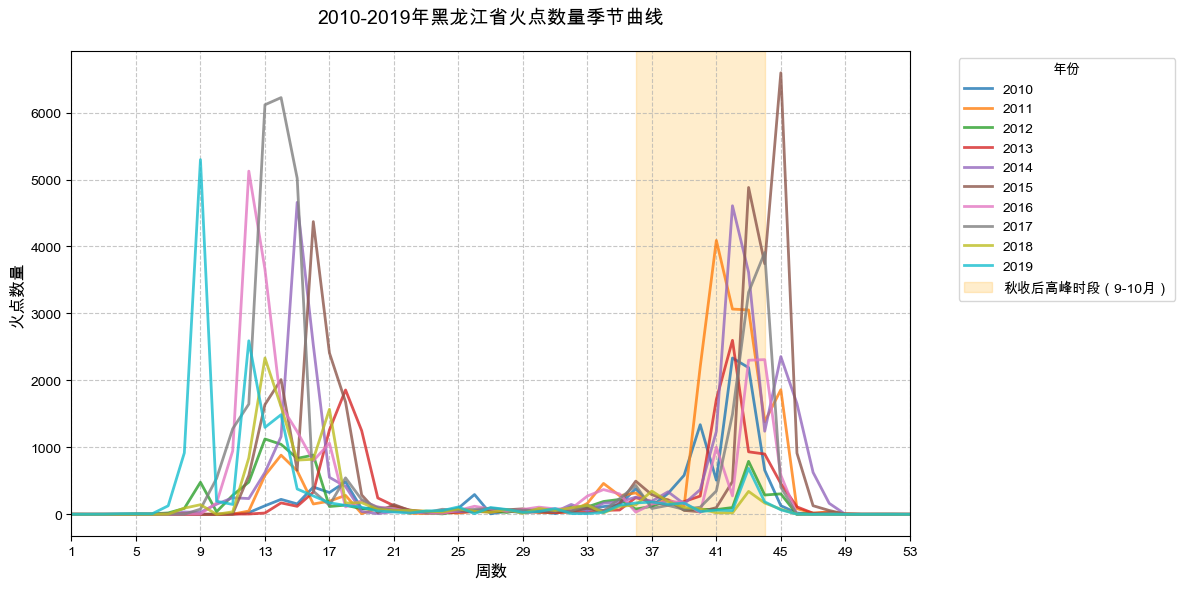

In [28]:
plt.figure(figsize=(12, 6))

for year in years:
    year_data = full_data[full_data["year"] == year]
    plt.plot(
        year_data["week"], 
        year_data["fire_count"], 
        label=str(year), 
        linewidth=2,
        alpha=0.8
    )

plt.axvspan(36, 44, color='orange', alpha=0.2, label="秋收后高峰时段（9-10月）")

plt.xlabel("周数", fontsize=12)
plt.ylabel("火点数量", fontsize=12)
plt.title("2010-2019年黑龙江省火点数量季节曲线", fontsize=14, pad=20)
plt.xlim(1, 53)
plt.xticks(range(1, 54, 4))
plt.grid(linestyle="--", alpha=0.7)
plt.legend(title="年份", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [29]:
plt.savefig("2010-2019黑龙江省火点数量季节曲线.png", dpi=300, bbox_inches="tight")
plt.close()

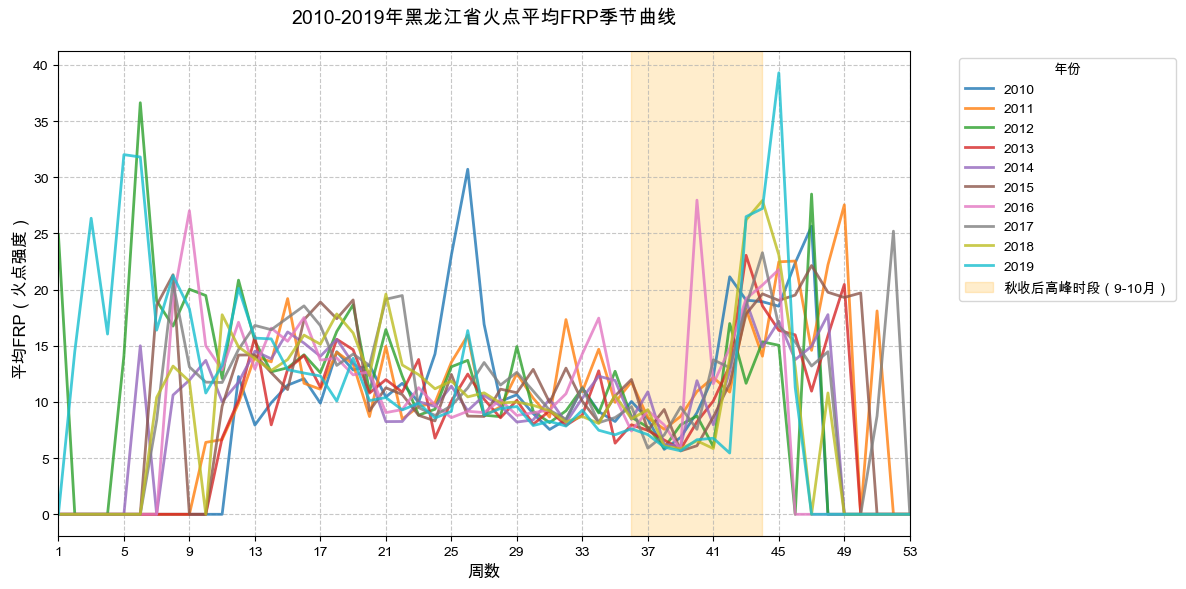

In [30]:
plt.figure(figsize=(12, 6))

for year in years:
    year_data = full_data[full_data["year"] == year]
    plt.plot(
        year_data["week"], 
        year_data["avg_frp"], 
        label=str(year), 
        linewidth=2,
        alpha=0.8
    )

plt.axvspan(36, 44, color='orange', alpha=0.2, label="秋收后高峰时段（9-10月）")

plt.xlabel("周数", fontsize=12)
plt.ylabel("平均FRP（火点强度）", fontsize=12)
plt.title("2010-2019年黑龙江省火点平均FRP季节曲线", fontsize=14, pad=20)
plt.xlim(1, 53)
plt.xticks(range(1, 54, 4))
plt.grid(linestyle="--", alpha=0.7)
plt.legend(title="年份", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [31]:
plt.savefig("2010-2019黑龙江省火点平均FRP季节曲线.png", dpi=300, bbox_inches="tight")
plt.close()

In [32]:
print("✅ 中文正常显示！火点季节曲线绘制完成：")
print(f"- 数量曲线：{os.path.abspath('2010-2019黑龙江省火点数量季节曲线.png')}")
print(f"- 强度曲线：{os.path.abspath('2010-2019黑龙江省火点平均FRP季节曲线.png')}")

✅ 中文正常显示！火点季节曲线绘制完成：
- 数量曲线：/Users/edith/miniprogram1/2010-2019黑龙江省火点数量季节曲线.png
- 强度曲线：/Users/edith/miniprogram1/2010-2019黑龙江省火点平均FRP季节曲线.png


3. 用 Z-score 识别 “异常高峰周”

In [33]:
import pandas as pd
import os
import numpy as np

In [34]:
weekly_stats = pd.read_csv("2010-2019黑龙江省每周火点统计表.csv")

In [35]:
weekly_stats["fire_count"] = pd.to_numeric(weekly_stats["fire_count"], errors="coerce").fillna(0)

In [36]:
global_mean = weekly_stats["fire_count"].mean()
global_std = weekly_stats["fire_count"].std()

In [37]:
if global_std == 0:
    raise ValueError("所有周火点数无波动，无法计算Z-score")

In [38]:
weekly_stats["Z_score"] = (weekly_stats["fire_count"] - global_mean) / global_std

In [39]:
weekly_stats["is_abnormal"] = weekly_stats["Z_score"] > 2
weekly_stats["Z_score"] = weekly_stats["Z_score"].round(3)

In [40]:
def add_remark(row):
    week = row["week"]
    is_abnormal = row["is_abnormal"]
    if not is_abnormal:
        return "无"
    elif 36 <= week <= 44:
        return "可能与玉米/小麦秋收后秸秆焚烧相关"
    elif 12 <= week <= 18:
        return "可能与春季春耕前秸秆清理焚烧相关"
    else:
        return "需结合农业物候、气象数据进一步分析异常原因"

weekly_stats["remark"] = weekly_stats.apply(add_remark, axis=1)

In [41]:
output_cols = ["year", "week", "fire_count", "Z_score", "is_abnormal", "remark"]
abnormal_stats = weekly_stats[output_cols].sort_values(["year", "week"]).reset_index(drop=True)

In [42]:
output_path = "2010-2019黑龙江省火灾异常高峰周统计表.csv"
abnormal_stats.to_csv(output_path, index=False, encoding="utf-8")

In [43]:
total_abnormal_weeks = abnormal_stats["is_abnormal"].sum()
abnormal_detail = abnormal_stats[abnormal_stats["is_abnormal"]][["year", "week", "fire_count", "Z_score", "remark"]]

In [44]:
print(f"✅ 异常高峰周识别完成！")
print(f"📊 全局统计：所有周火点数均值={global_mean:.1f}，标准差={global_std:.1f}")
print(f"🔍 共识别出 {total_abnormal_weeks} 个异常高峰周（Z>2）：")
print(abnormal_detail.to_string(index=False))
print(f"\n📁 统计表已保存至：{os.path.abspath(output_path)}")

✅ 异常高峰周识别完成！
📊 全局统计：所有周火点数均值=489.7，标准差=1026.8
🔍 共识别出 20 个异常高峰周（Z>2）：
 year  week  fire_count  Z_score                remark
 2011    41        4090    3.506     可能与玉米/小麦秋收后秸秆焚烧相关
 2011    42        3065    2.508     可能与玉米/小麦秋收后秸秆焚烧相关
 2011    43        3052    2.495     可能与玉米/小麦秋收后秸秆焚烧相关
 2013    42        2598    2.053     可能与玉米/小麦秋收后秸秆焚烧相关
 2014    15        4659    4.060      可能与春季春耕前秸秆清理焚烧相关
 2014    42        4608    4.011     可能与玉米/小麦秋收后秸秆焚烧相关
 2014    43        3614    3.043     可能与玉米/小麦秋收后秸秆焚烧相关
 2015    16        4371    3.780      可能与春季春耕前秸秆清理焚烧相关
 2015    43        4881    4.276     可能与玉米/小麦秋收后秸秆焚烧相关
 2015    44        3742    3.167     可能与玉米/小麦秋收后秸秆焚烧相关
 2015    45        6593    5.944 需结合农业物候、气象数据进一步分析异常原因
 2016    12        5125    4.514      可能与春季春耕前秸秆清理焚烧相关
 2016    13        3660    3.087      可能与春季春耕前秸秆清理焚烧相关
 2017    13        6116    5.479      可能与春季春耕前秸秆清理焚烧相关
 2017    14        6223    5.583      可能与春季春耕前秸秆清理焚烧相关
 2017    15        5019    4.411      可能与春季春耕前秸秆清理焚